In [1]:
# import libraries

# Basic libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


#NLTK libraries
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from PIL import Image
import wordcloud
from collections import Counter


In [2]:
# read the file

df_clean = pd.read_csv('./Data/df_clean.csv')
df_clean.head(1)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,country,clean_text
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,usa,asked girlfriend


### Maximum view count of a trending video

In [3]:
# trending video with max view count
df_clean[df_clean['view_count'] == df_clean['view_count'].max()].transpose()

,24040
video_id,5MkDvM0zvWs
title,The Invisible Glass Cube #shorts Experiment by...
publishedAt,2021-06-20
channelTitle,FAMILY BOOMS
categoryId,24
trending_date,2021-07-02
tags,shorts|youtube shorts|tiktok videos|family boo...
view_count,102169989
likes,3602498
dislikes,76208


### View-count distribution

In [4]:
def plot_conf(ax, xlbl='', ylbl='', t='', back_color='#ffffff',
              text_color='#616161', grid_color='#e9e9e9', 
              tick_color='', ticklbl_size=9, lbl_size=11, lang='en'):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor(back_color)
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor=text_color, color=back_color)
    if tick_color != '':
        ax.tick_params(axis='both', color=tick_color)
    ax.tick_params(axis='both', which='major', labelsize=ticklbl_size)
    # adding a grid and specifying its color
    ax.grid(True, color=grid_color)
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color(back_color)
    ax.spines['top'].set_color(back_color) 
    ax.spines['right'].set_color(back_color)
    ax.spines['left'].set_color(back_color)
    # setting the title, x label, and y label of the plot
    if lang == 'ar':
        ax.set_title(get_display(reshaper.reshape(t)), fontweight='bold', family='Amiri',
                     fontsize=14, color=text_color, loc='right', pad=24);
        ax.set_xlabel(get_display(reshaper.reshape(xlbl)), fontweight='bold', family='Amiri',
                      labelpad=16, fontsize=lbl_size, color=text_color, fontstyle='italic');
        ax.set_ylabel(get_display(reshaper.reshape(ylbl)), fontweight='bold', family='Amiri',
                      color=text_color, labelpad=16, fontsize=lbl_size, fontstyle='italic');
    else:
        ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
        ax.set_xlabel(xlbl, labelpad=16, fontsize=lbl_size, color='#616161', fontstyle='italic');
        ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=lbl_size, fontstyle='italic');
        

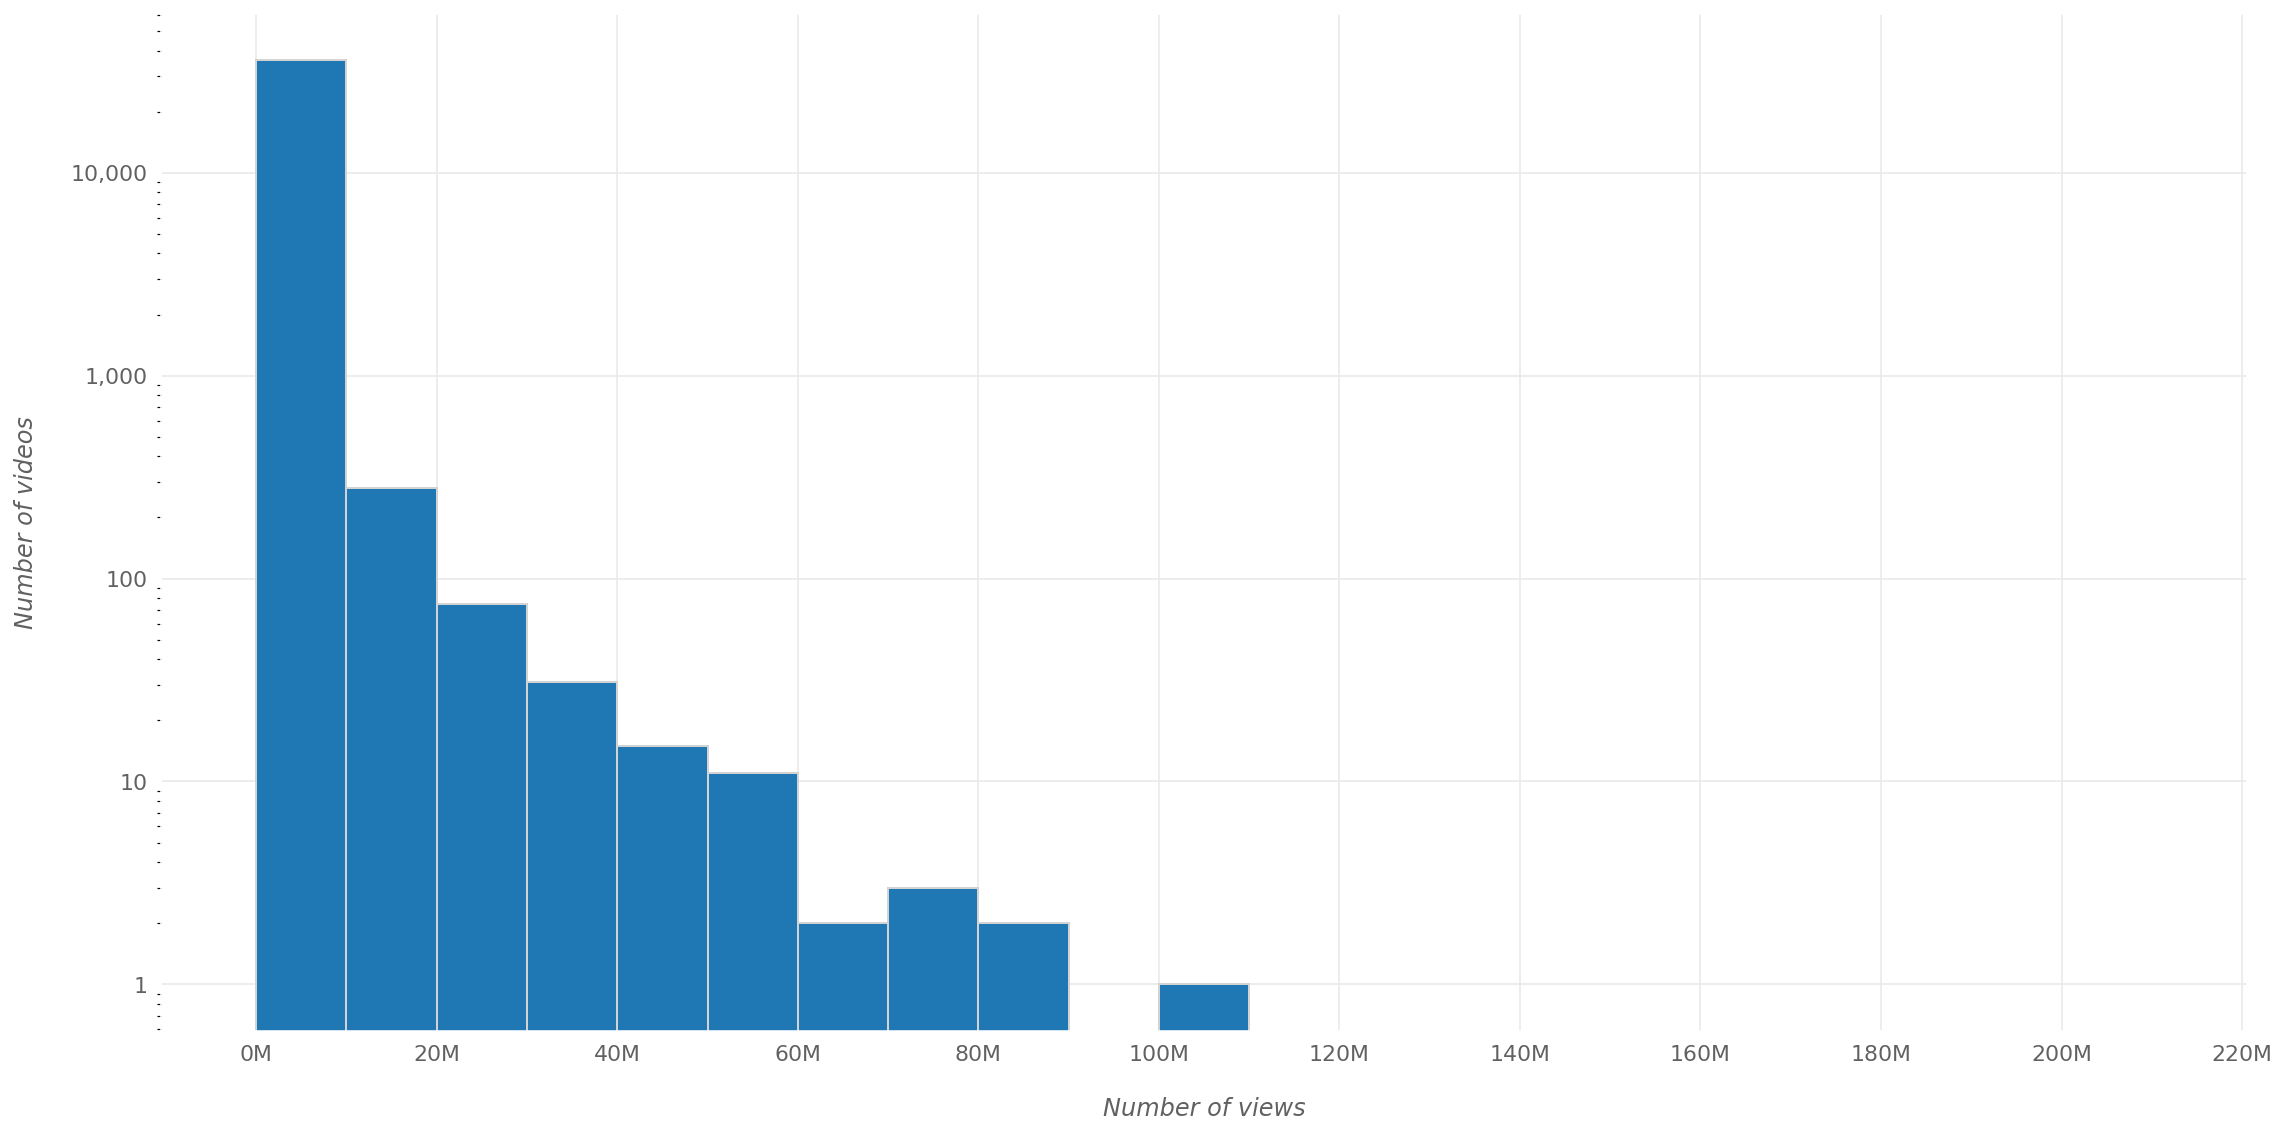

In [40]:
ax = df_clean['view_count'].plot(kind='hist', bins=np.arange(0, 220e6, 10e6)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
plot_conf(ax, xlbl='Number of views', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()

### Trending videos with most views

In [6]:
df_clean.sort_values(by='view_count', ascending=False).drop_duplicates(subset=['video_id']).head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,country,clean_text
24040,5MkDvM0zvWs,The Invisible Glass Cube #shorts Experiment by...,2021-06-20,FAMILY BOOMS,24,2021-07-02,shorts|youtube shorts|tiktok videos|family boo...,102169989,3602498,76208,31232,False,False,Subscribe ❤ click ▶ https://urlgeni.us/youtube...,Entertainment,canada,invisible glass cube #shorts experiment family...
13611,awkkyBH2zEo,LISA - 'LALISA' M/V,2021-09-10,BLACKPINK,10,2021-09-11,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,85890366,5921316,38624,1958529,False,False,LISA - LALISA내 뒷모습만 봐도 알잖아어두워질 때 분홍빛이나새하얀 조명이 ...,Music,usa,lisa lalisa v
32730,P0ya8iGw2QE,HOW CRYPTOCURRENCY WORKS 💸👨🏻‍💻,2021-05-27,Alan Chikin Chow,23,2021-06-06,alan chikin chow|tiktok|superhero fanfics be l...,81515096,3381953,128561,6465,False,False,Hey Alan Army! This video is called How Crypto...,Comedy,united kingdom,cryptocurrency works
17947,CvCtn5Q_nzs,Crazy #alluarjun #painting #shorts #viral #tr...,2021-12-08,Dr.Harrsha Artist,1,2021-12-22,[None],79283769,5311001,0,24705,False,False,Crazy #alluarjun #painting #shorts #viral #tr...,Film & Animation,usa,crazy #alluarjun #painting #shorts #viral #tre...
51,hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Offic...,2020-08-07,Cardi B,10,2020-08-12,Cardi B|Cardi|Atlantic Records|rap|hip hop|tra...,76805026,2820345,382578,270263,False,False,Cardi B - WAP feat. Megan Thee StallionStream/...,Music,usa,cardi b wap feat megan thee stallion official ...


### Trending videos with least views

In [7]:
(df_clean[df_clean['view_count'] > 0].sort_values(by='view_count', ascending=True).drop_duplicates(subset=['video_id']).head(3))

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,country,clean_text
30183,ec86Jb1GXno,"Maya Jama spills the tea on relationships, rum...",2021-01-11,cosmopolitanuk,24,2021-01-12,cosmopolitan|cosmopolitan uk|cosmo uk|cosmo|ma...,9097,393,4,21,False,False,After wrapping up our interview with Maya Jama...,Entertainment,united kingdom,maya jama spills tea relationships rumours unu...
28434,PD2uwT-cHIA,Most Haunted Is Back! A New Episode Coming Soo...,2020-10-06,Most Haunted Official,24,2020-10-07,most haunted|yvette fielding|karl beattie|para...,10633,1691,6,323,False,False,Yvette Fielding and the Most Haunted team are ...,Entertainment,united kingdom,haunted back new episode coming soon
27503,opOtn3G2vng,OPENING MY GCSE RESULTS 2020,2020-08-20,Floral Louisa,24,2020-08-20,teenager|makeup|beauty|fashion|clothes|lifesty...,14036,961,42,213,False,False,"Hello Everybody! If you're new, my name is Lou...",Entertainment,united kingdom,opening gcse results


### How many views a video has when first appearing on the trending list?

In [8]:
cdf = df_clean.drop_duplicates(subset=['video_id'])

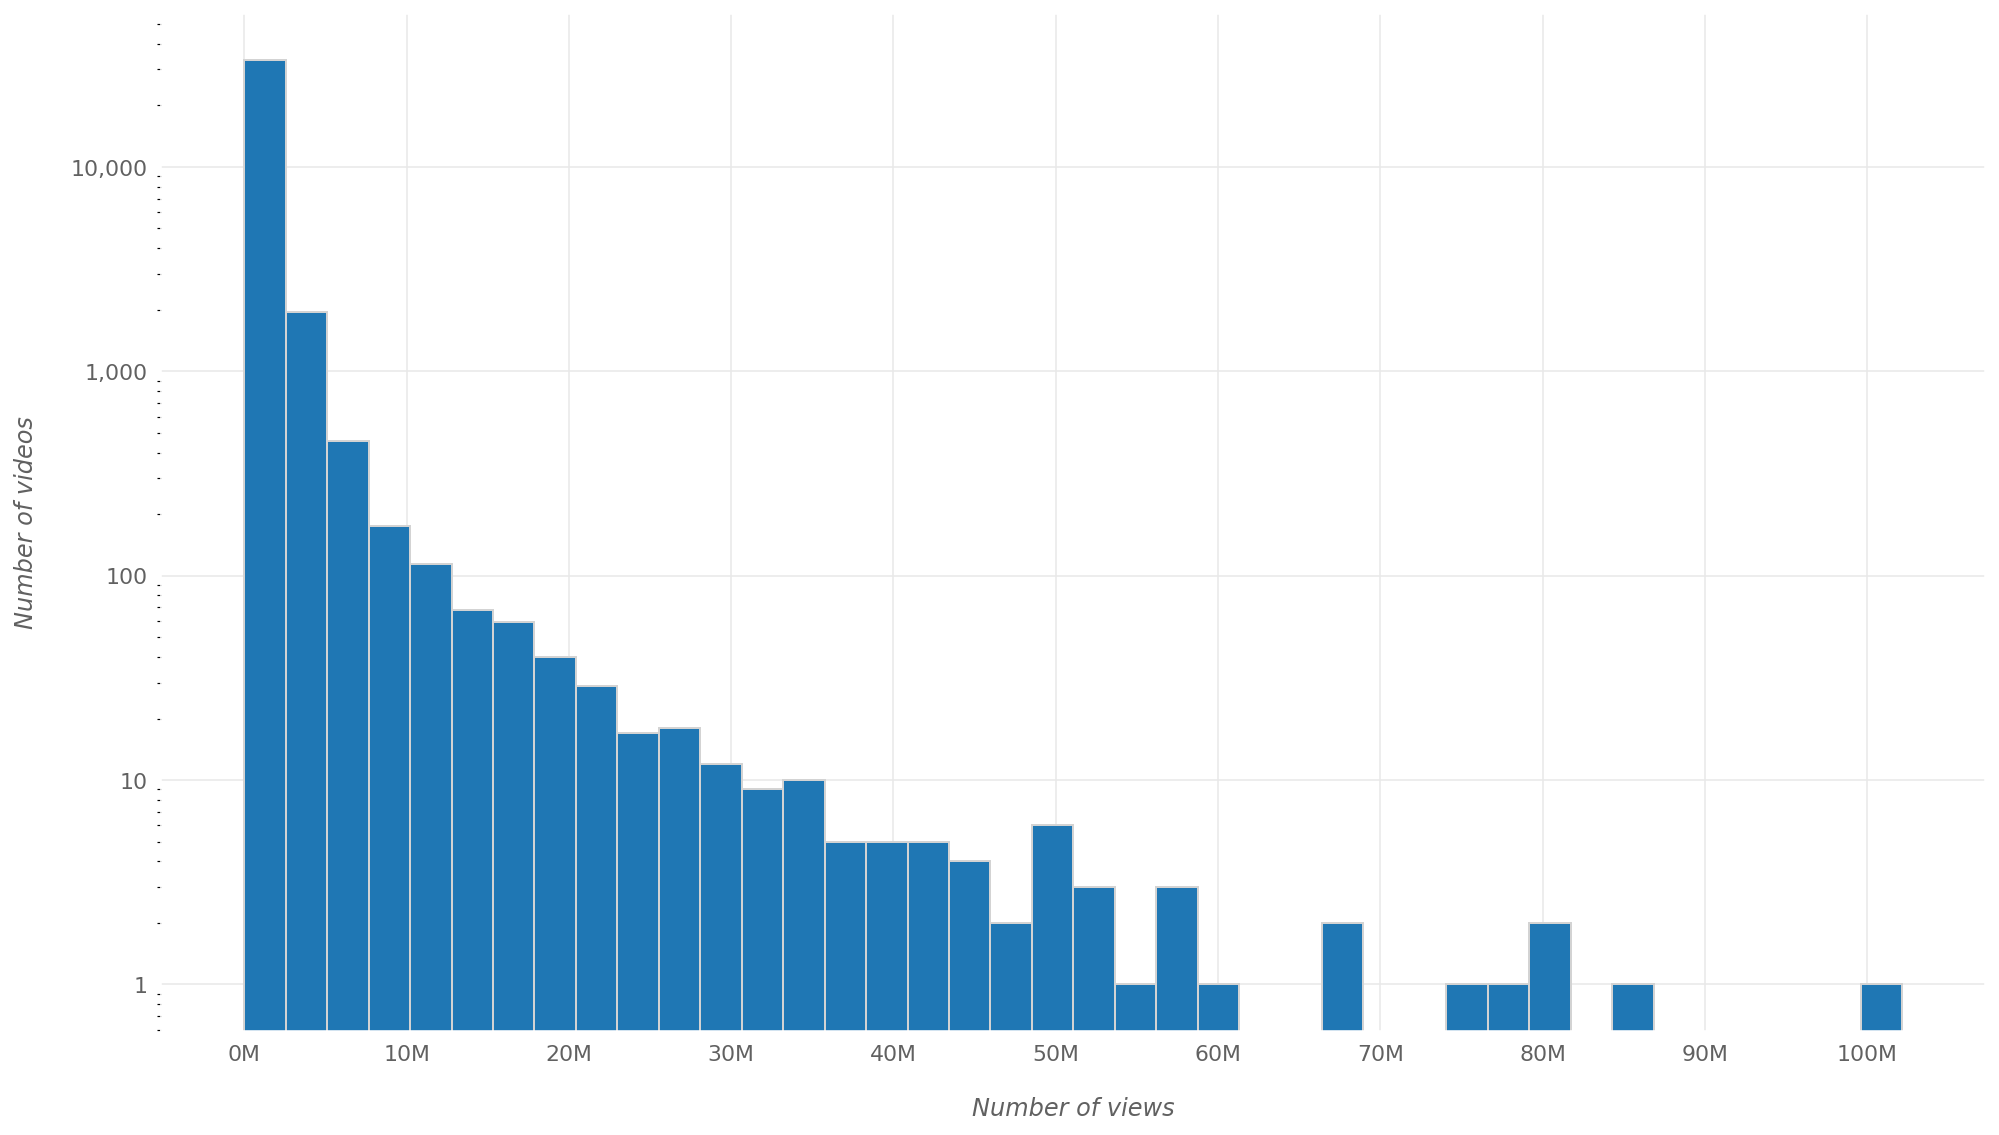

In [9]:
ax = cdf['view_count'].plot(kind='hist', figsize=(14,8), bins=40, logy=True,
                            lw=1, ec='lightgray')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
def millions(x, pos):
    return '{}M'.format(int(x / 1000000))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions));

plot_conf(ax, xlbl='Number of views', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
plt.tight_layout()

### Trending for 30 Days

In [10]:
videos_appeared_most = df_clean.groupby('video_id').size().sort_values(ascending=False).head()
indexes = videos_appeared_most.index.values
tdf = df_clean[df_clean['video_id'].isin(indexes)].sort_values(
    by='trending_date', ascending=True).drop_duplicates(subset=['video_id'])
tdf['trending_days'] = tdf['video_id'].map(videos_appeared_most)
tdf.sort_values(by='trending_days', ascending=False, inplace=True)
tdf = tdf[['title', 'trending_days', 'view_count', 'likes', 
           'dislikes', 'comment_count', 'category_name']]
tdf.rename(columns={'trending_date': 'first_trending_date'}, inplace=True)
tdf

,title,trending_days,view_count,likes,dislikes,comment_count,category_name
2523,NCT U 엔시티 유 'Make A Wish (Birthday Song)' MV T...,1,3810956,370650,831,16353,Music
29177,BELGIUM vs ENGLAND LIVE Watchalong with Mark G...,1,101841,2625,80,55,Entertainment
33142,Jadon Sancho • Magical Skills & Goals,1,304339,8753,76,988,Sports
12025,TOKYO REVENGERS = BLACK AIR FORCE ENERGY THE A...,1,363891,38305,134,2997,Film & Animation
25768,The Queen’s speech at the COP26 Evening Reception,1,181765,5980,334,0,People & Blogs


### Trending Videos Titles

C:\Users\rimay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


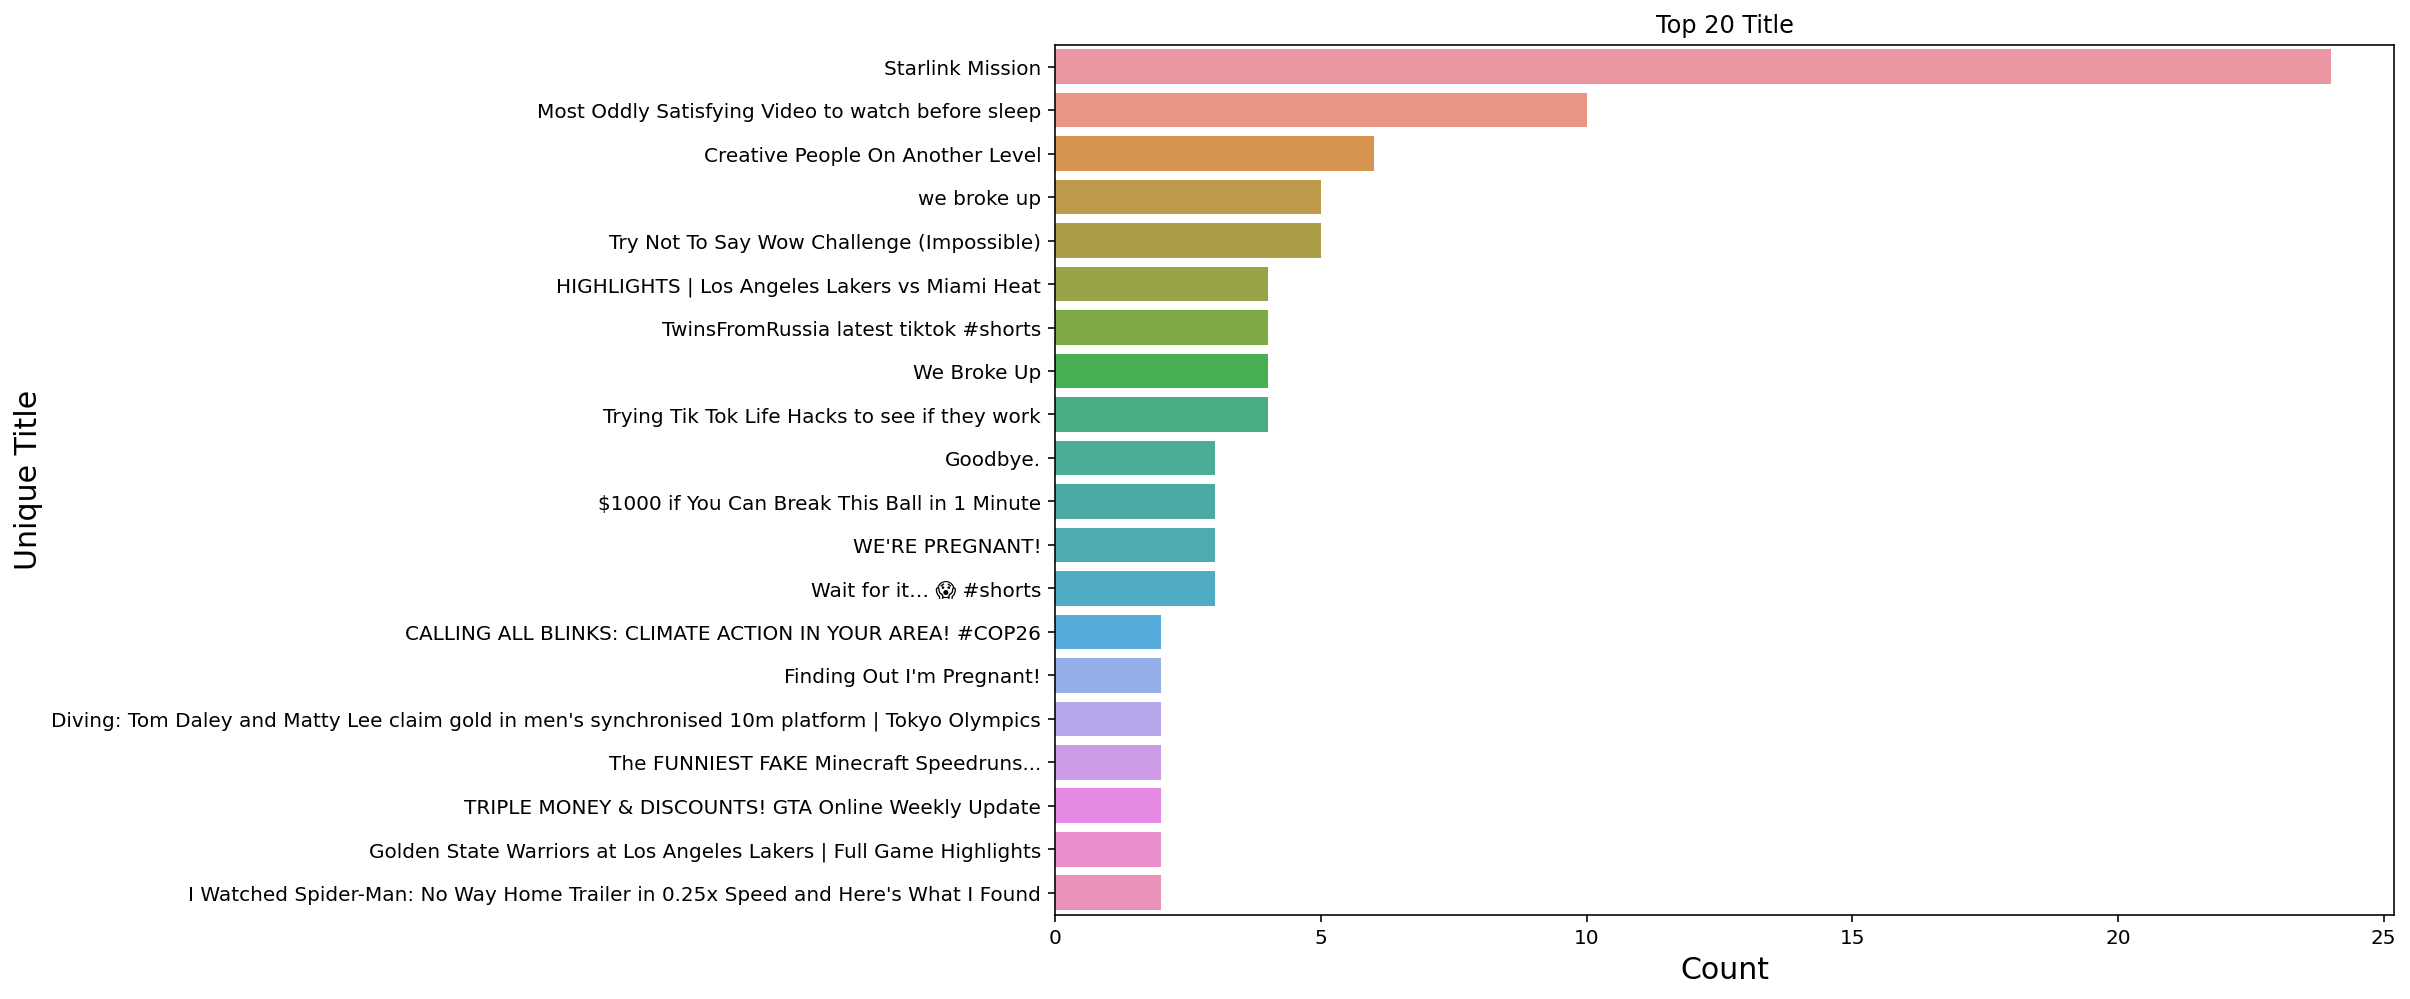

In [11]:
# Look for the popular post for the title

headlines = df_clean['title'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(headlines.values, headlines.index)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Unique Title", fontsize=15)
plt.title("Top 20 Title")
plt.show()


### Most common words in video titles

In [12]:
df_clean['clean_text'] = df_clean['clean_text'].map(str)

In [13]:
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
    return colors[len(word)%len(colors)]

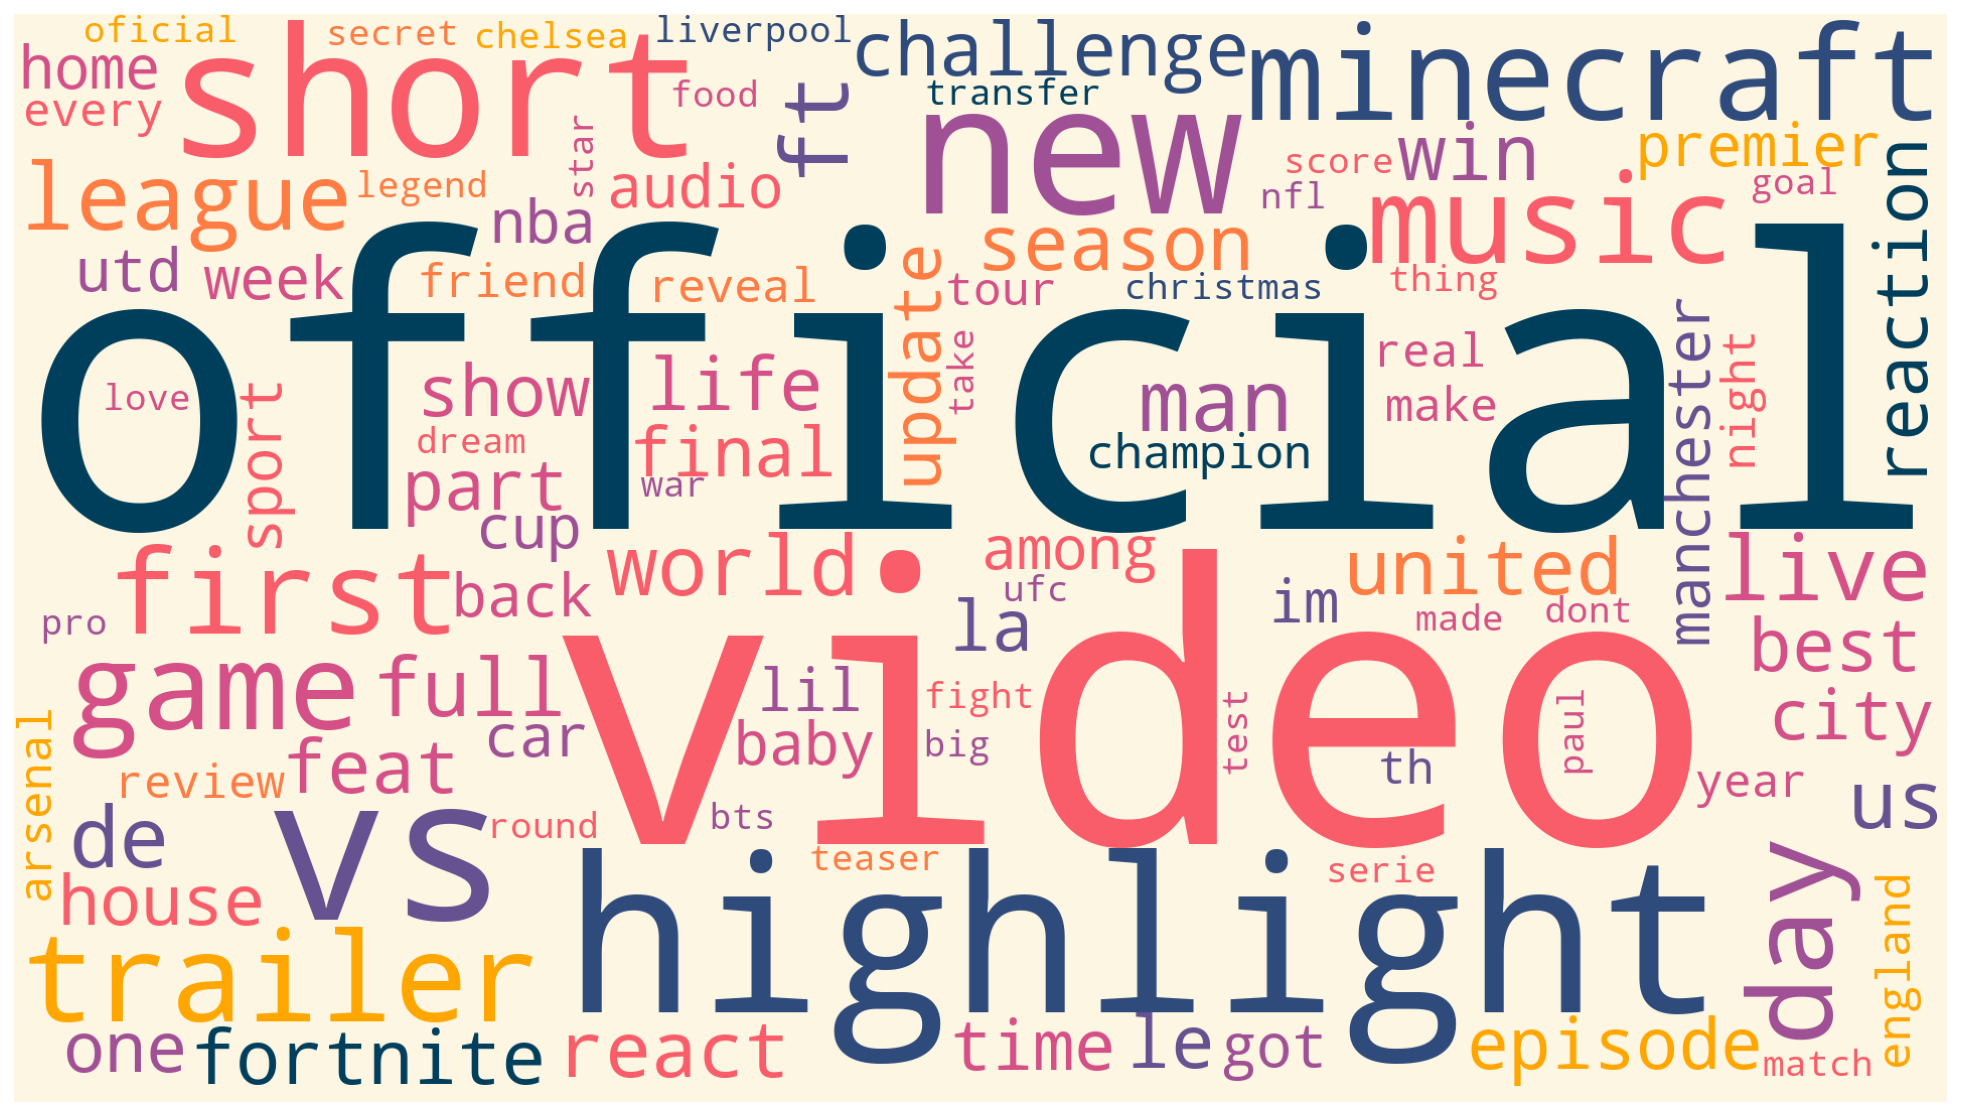

In [14]:

# Generate a basic word cloud for title
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in df_clean['clean_text']])
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1920, height=1080,collocations=False, 
                         background_color="#fdf6e3", color_func=col_func, 
                         max_words=100,random_state=7, max_font_size=400, 
                         relative_scaling=0.4).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
# source: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


In [16]:
df_clean['title'] = df_clean['title'].map(str)
all_titles = ' '.join([x.lower() for x in df_clean['title']])
for k,v in contractions.items():
    if isinstance(v, list):
        v = random.choice(v)
    all_titles = all_titles.replace(k.lower(), v.lower())

In [17]:
title_symbols = re.sub(r'\w', '', all_titles)
title_symbols = re.sub(r'\s', '', title_symbols)
title_symbols = list(title_symbols)
Counter(title_symbols).most_common(5)

[('|', 12568), ('-', 12071), ('.', 9693), ('!', 9483), (')', 7438)]

### Most common word in video titles

In [18]:
# To define function for N-gram analysis

def plot_top_words(df, col, n, n_gram_range, title, palette='tab10'):
    def get_top_n_words(corpus, n=n, k=n_gram_range):     
        vec = CountVectorizer(ngram_range=(k,k), stop_words='english').fit(corpus)     
        bag_of_words = vec.transform(corpus)     
        sum_words = bag_of_words.sum(axis=0)      
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]    
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
        return words_freq[:n]
    temp_df = pd.DataFrame(data=get_top_n_words(df[col], n), columns=['word','freq'])
    plt.figure(figsize=(10,6))
    sns.barplot(data=temp_df, y='word', x='freq', palette=palette)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(title, fontsize=18)

In [19]:
stop_words = set(CountVectorizer(stop_words = 'english').get_stop_words())

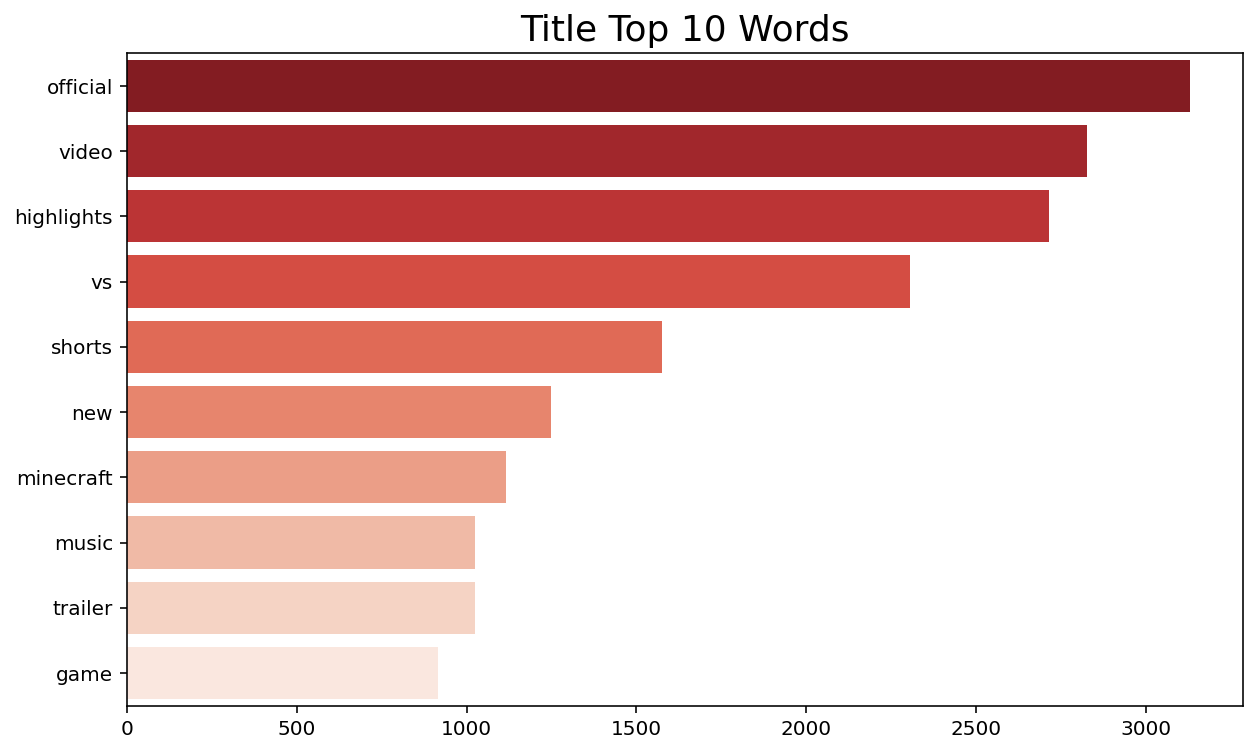

In [20]:
plot_top_words(df_clean,'clean_text', 10, 1, 'Title Top 10 Words', 'Reds_r')

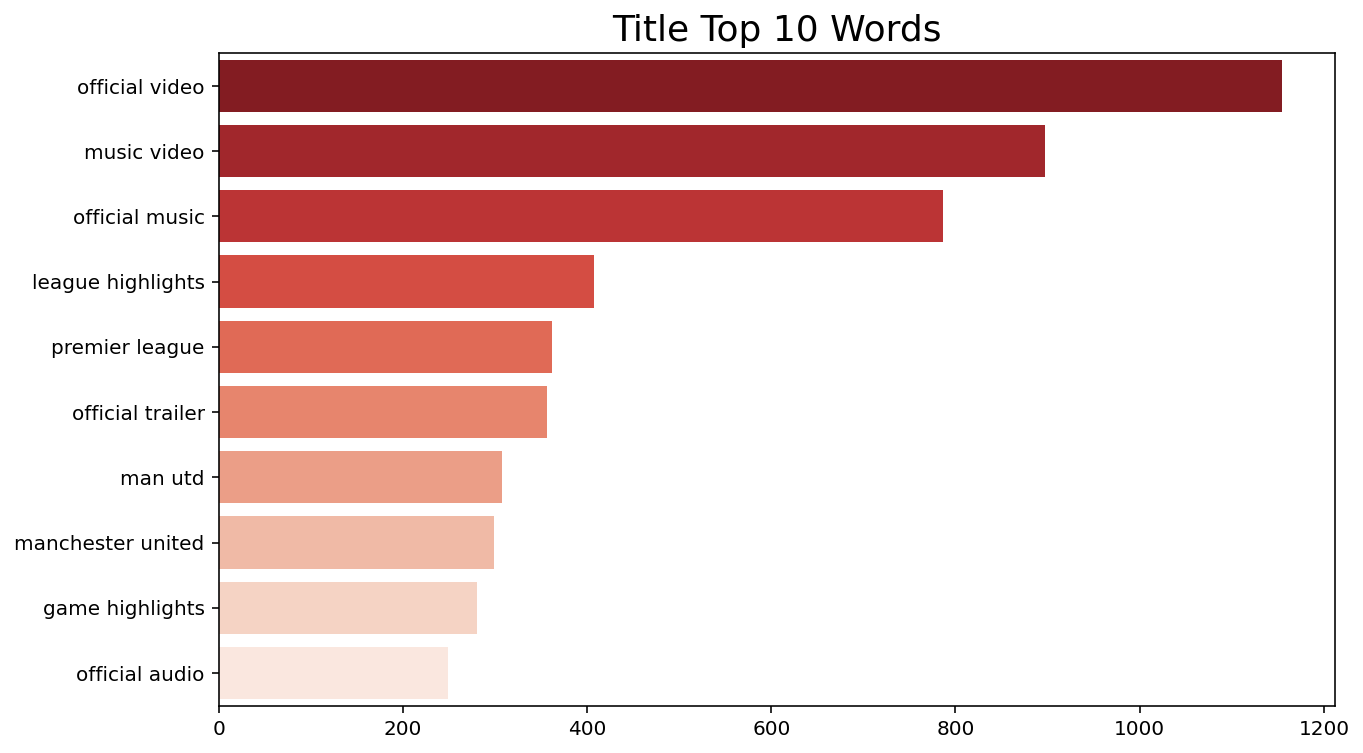

In [21]:
plot_top_words(df_clean,'clean_text', 10, 2, 'Title Top 10 Words', 'Reds_r')

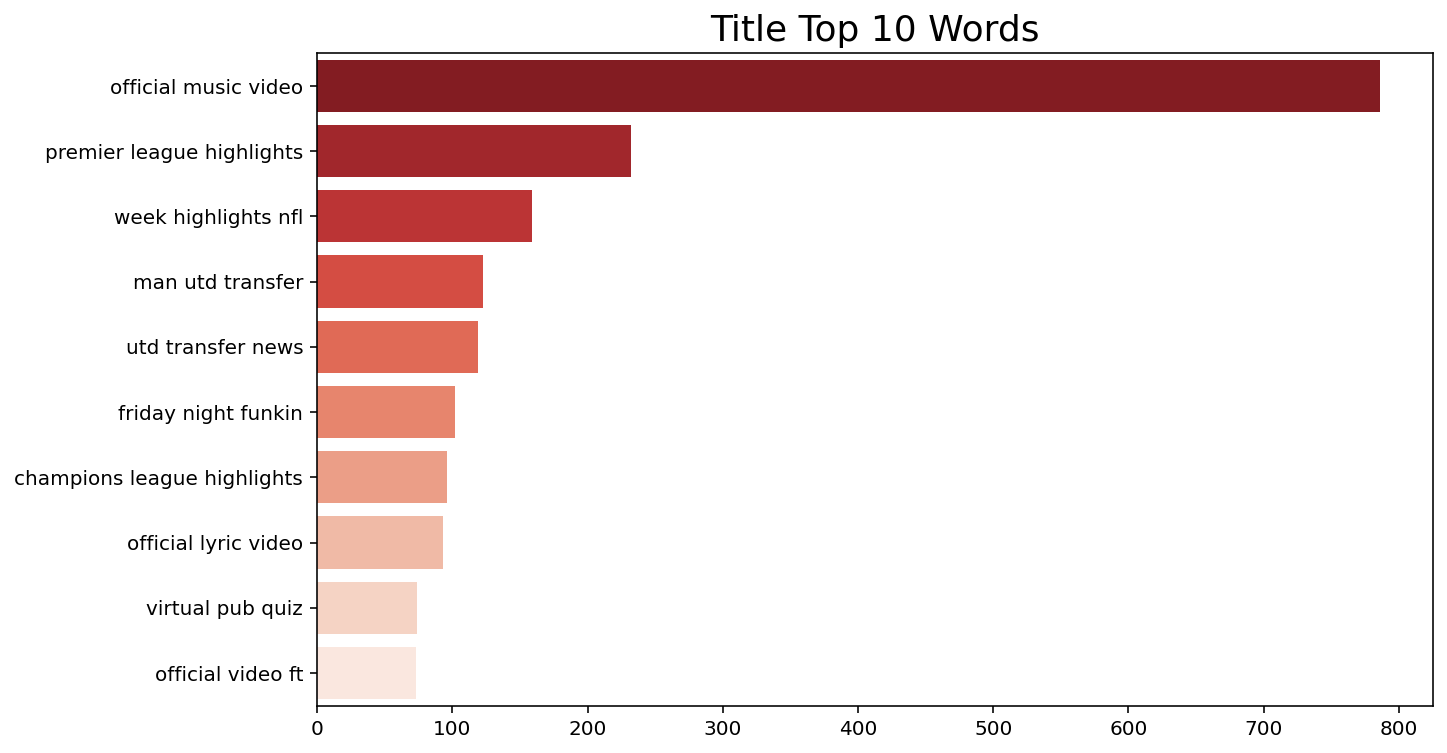

In [22]:
plot_top_words(df_clean,'clean_text', 10, 3, 'Title Top 10 Words', 'Reds_r')

### Distribution of title lengths

C:\Users\rimay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


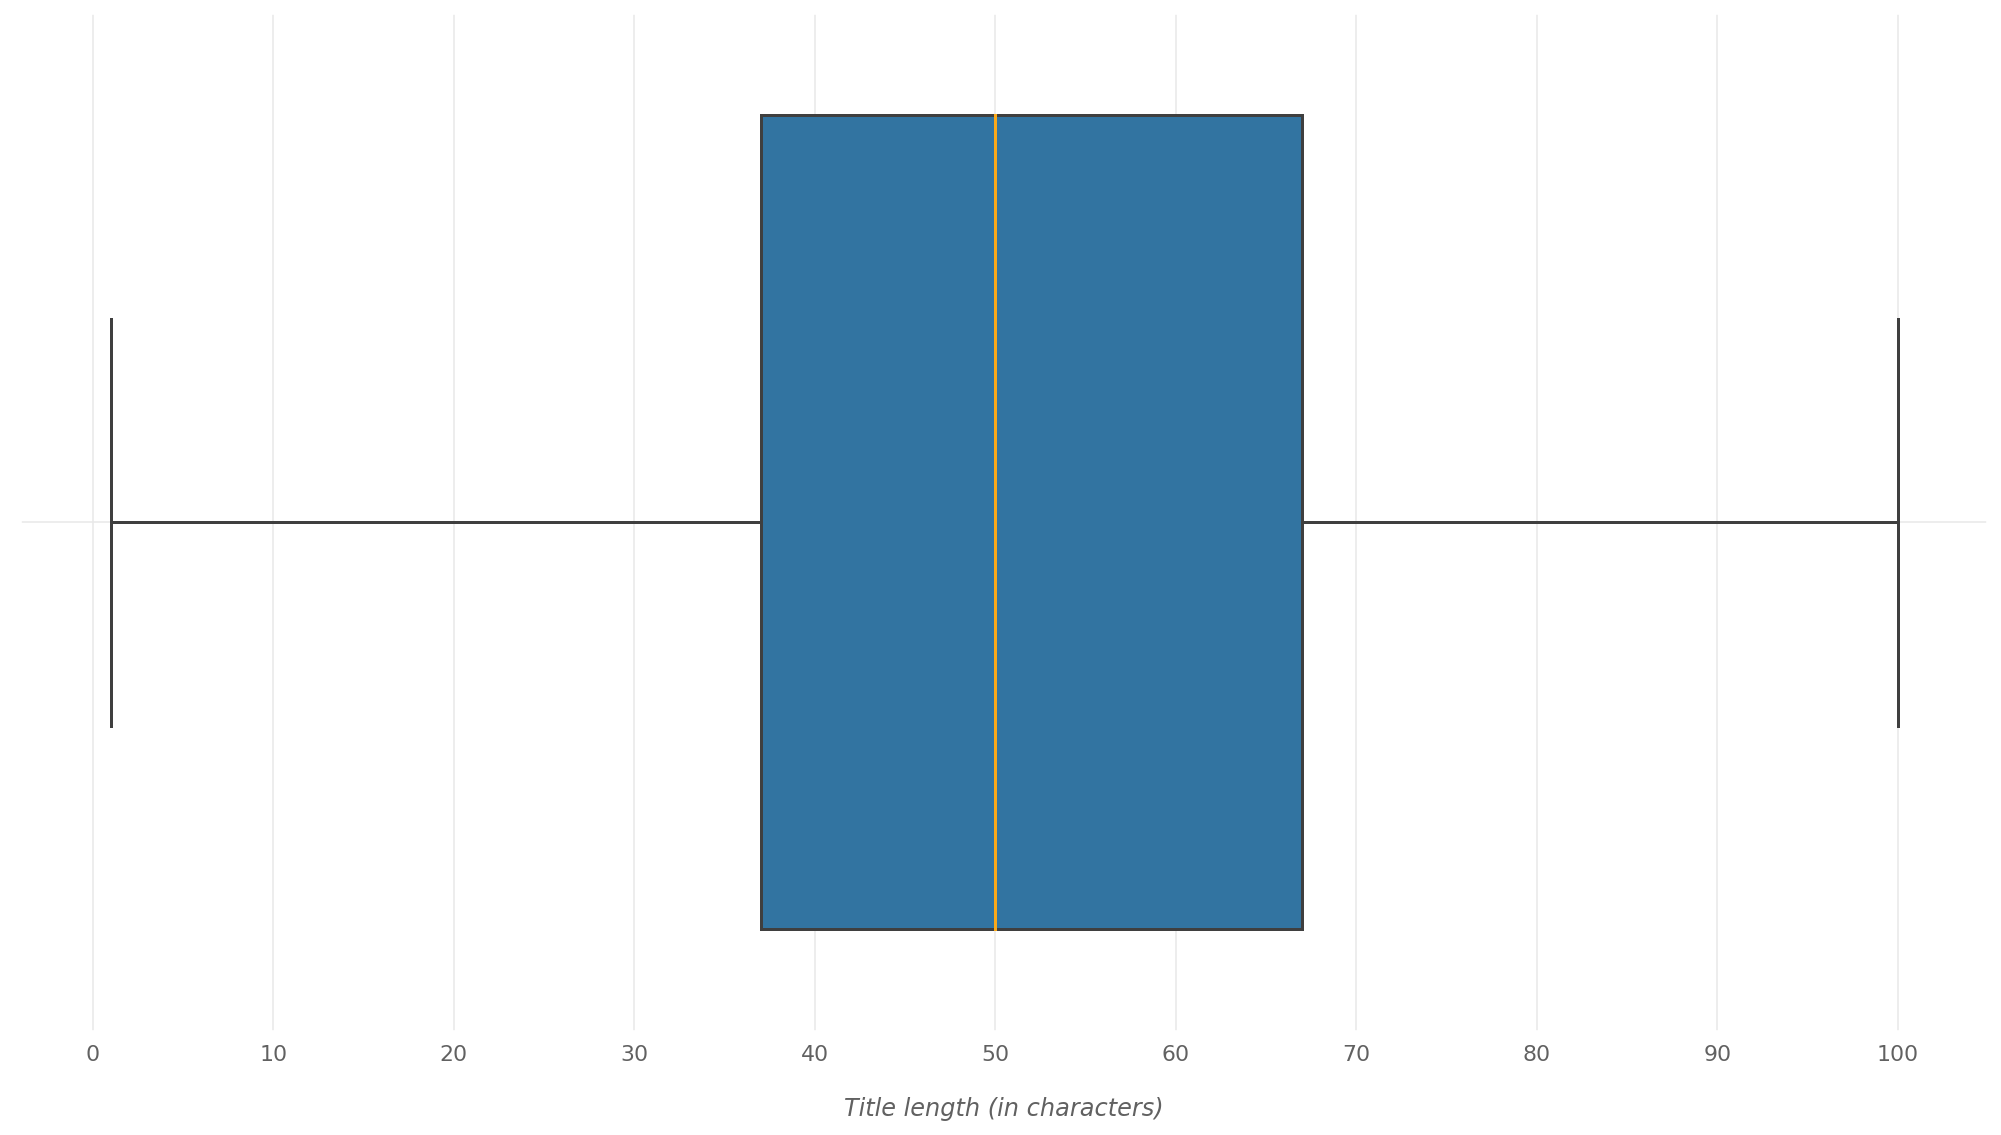

In [23]:
title_lengths = df_clean["title"].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(title_lengths, medianprops={'color': '#FBA91A'}, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plot_conf(ax, xlbl='Title length (in characters)', ticklbl_size=11, lbl_size=12)
plt.tight_layout()

In [24]:
title_lengths.describe()

count    36355.000000
mean        53.016669
std         21.392519
min          1.000000
25%         37.000000
50%         50.000000
75%         67.000000
max        100.000000
Name: title, dtype: float64

In [25]:
title_lengths.quantile(q=0.80)

72.0

In [26]:
title_lengths.quantile(q=0.90)

86.0

In [27]:
df_clean[title_lengths == 3].head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,country,clean_text
10216,5TkJttv67xU,sam,2021-06-09,Pringus McDingus,1,2021-06-10,[None],585961,83594,402,3876,False,False,sample textvoice of Sam: https://twitter.com/k...,Film & Animation,usa,sam
12838,s3EISTf1prk,bed,2021-08-18,emma chamberlain,24,2021-08-19,emma chamberlain|vlog,1273063,132862,499,7496,False,False,i spend more time in bed than anyone i knowcha...,Entertainment,usa,bed
22714,FnZXdQlXkgk,Hi!,2021-03-14,Kevin Tran,23,2021-03-15,Hi|présentation|introduction|kevin tran|salut|...,995886,141725,3669,9823,False,False,The prophet in Supernatural is named after me....,Comedy,canada,hi
35684,dsUsQQPwy4k,you,2022-01-02,Failboat,20,2022-01-04,Failboat,192130,15439,0,1719,False,False,Animal Crossing but its once again time for ni...,Gaming,united kingdom,nan


### Channels with Most Trending Videos

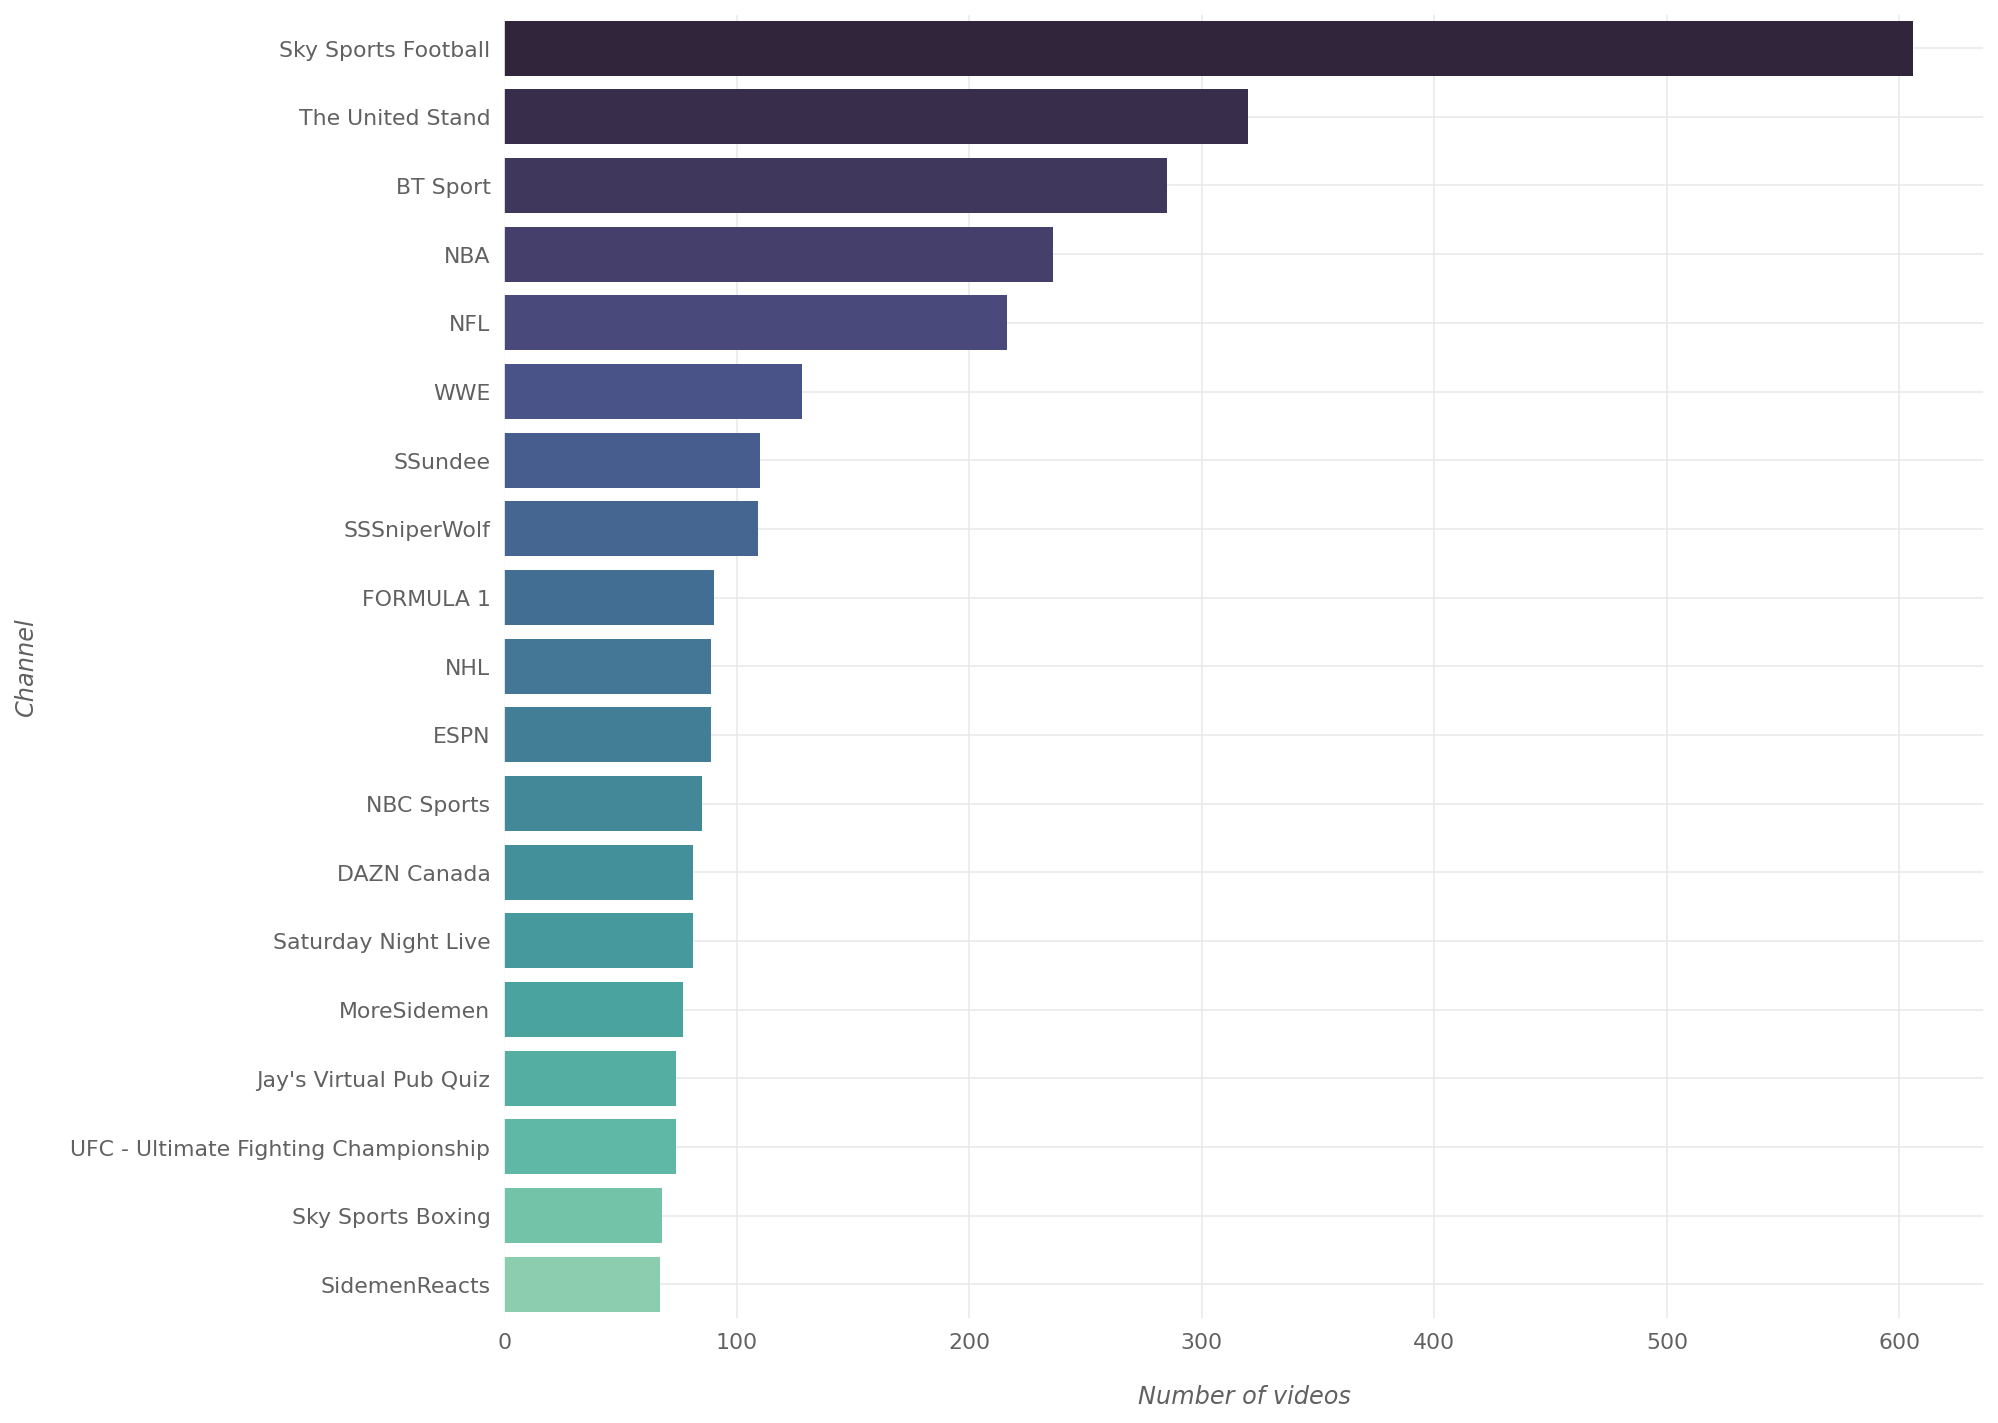

In [28]:
tdf = df_clean.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(19)
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(x="video_count", y="channelTitle", data=tdf,
            palette=sns.color_palette('mako', n_colors=25)[3:], ax=ax);
plot_conf(ax, xlbl='Number of videos', ylbl='Channel', ticklbl_size=11, lbl_size=12)
plt.tight_layout()

### Top Categories of Trending Videos

C:\Users\rimay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


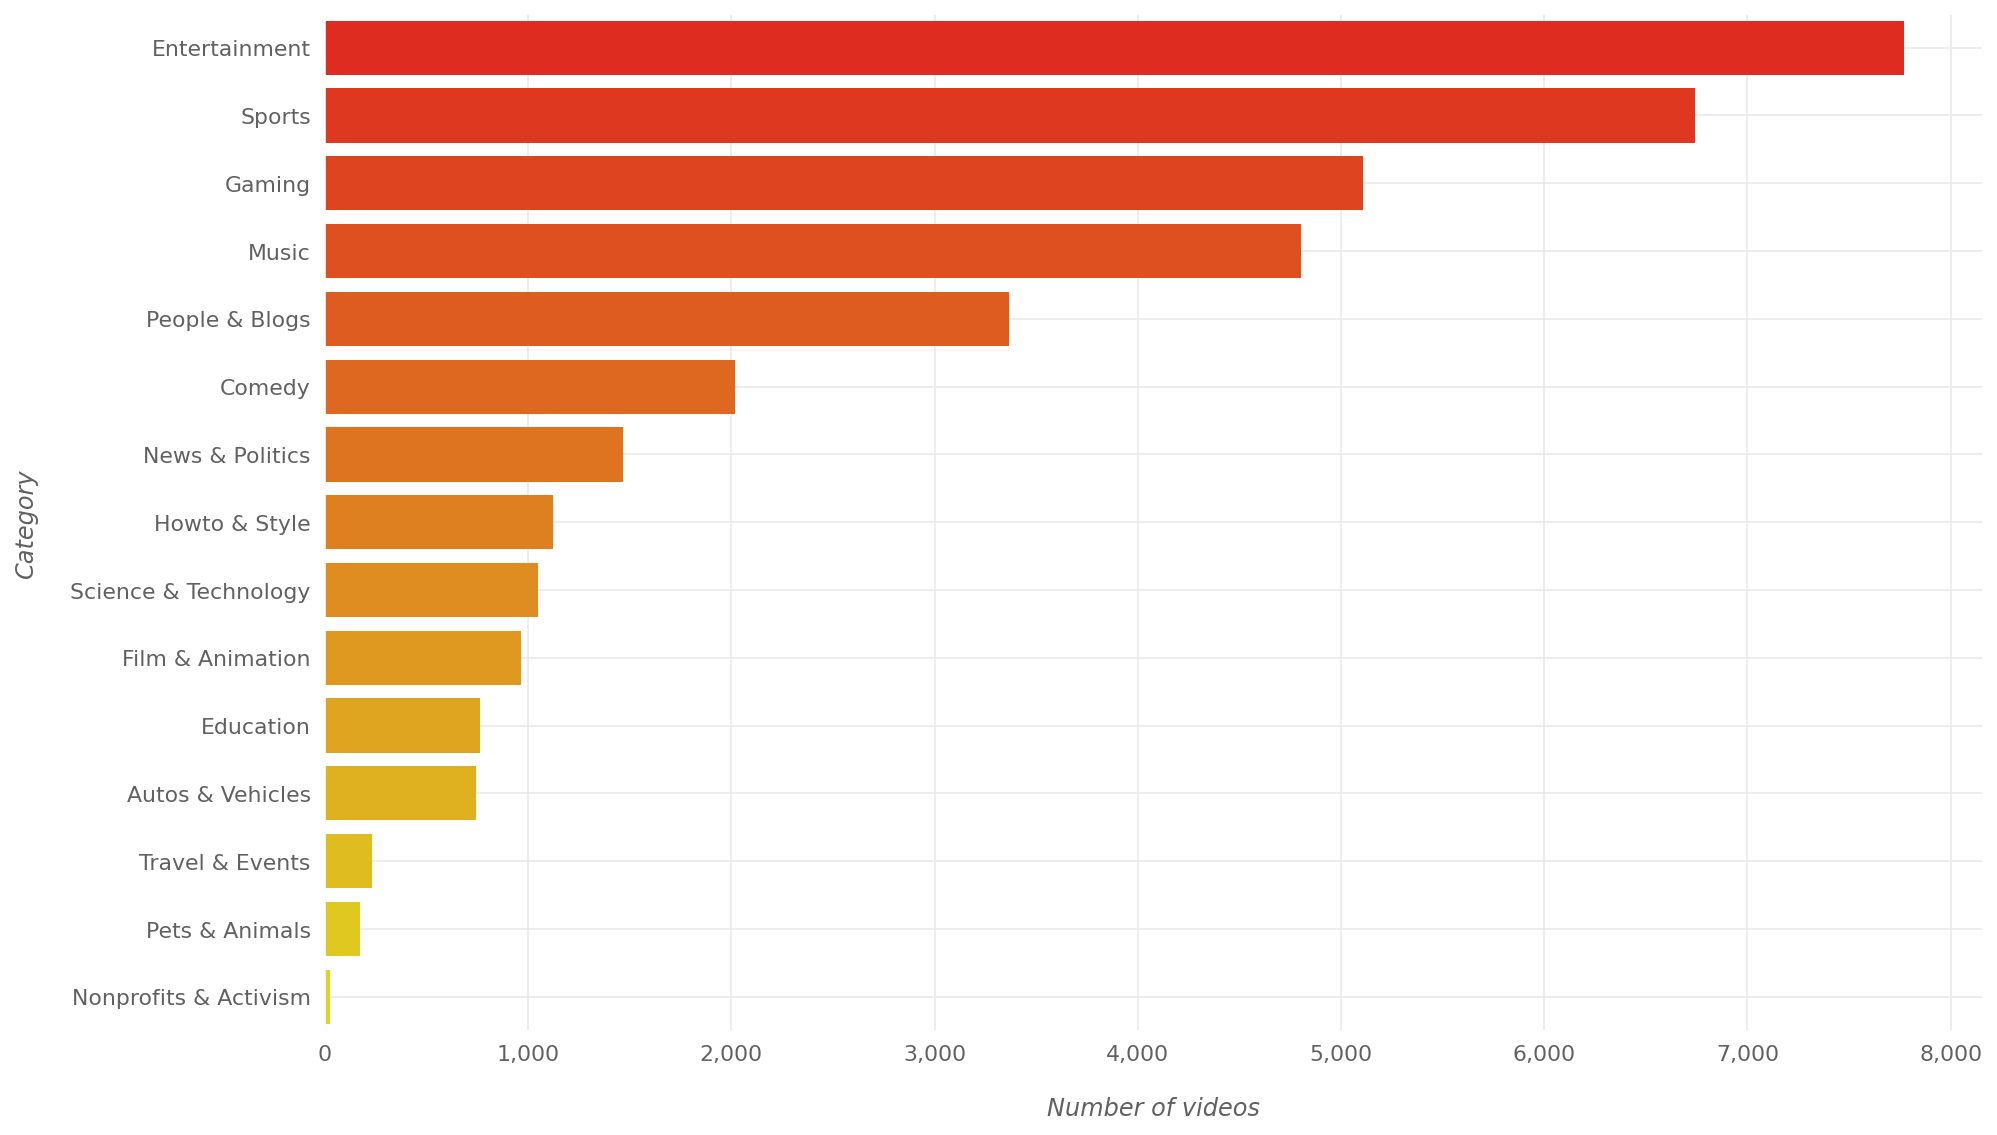

In [29]:
fig, ax = plt.subplots(figsize=(14,8))
tdf = df_clean['category_name'].value_counts(sort=True, ascending=False)
sns.barplot(tdf.values, tdf.index.values, hue=tdf.values, orient='h', 
            palette=reversed(sns.color_palette('autumn', n_colors=15)[:]), 
            dodge=False, ax=ax)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot_conf(ax, xlbl='Number of videos', ylbl='Category', ticklbl_size=11, lbl_size=12)
ax.get_legend().remove()
plt.tight_layout()

In [30]:
tdf

Entertainment            7769
Sports                   6742
Gaming                   5109
Music                    4805
People & Blogs           3366
Comedy                   2020
News & Politics          1467
Howto & Style            1121
Science & Technology     1051
Film & Animation          964
Education                 762
Autos & Vehicles          746
Travel & Events           233
Pets & Animals            174
Nonprofits & Activism      26
Name: category_name, dtype: int64

In [31]:
100 * tdf / len(df_clean)

Entertainment            21.369825
Sports                   18.544904
Gaming                   14.053088
Music                    13.216889
People & Blogs            9.258699
Comedy                    5.556320
News & Politics           4.035208
Howto & Style             3.083482
Science & Technology      2.890937
Film & Animation          2.651630
Education                 2.095998
Autos & Vehicles          2.051987
Travel & Events           0.640902
Pets & Animals            0.478614
Nonprofits & Activism     0.071517
Name: category_name, dtype: float64

### Trending Videos Comments

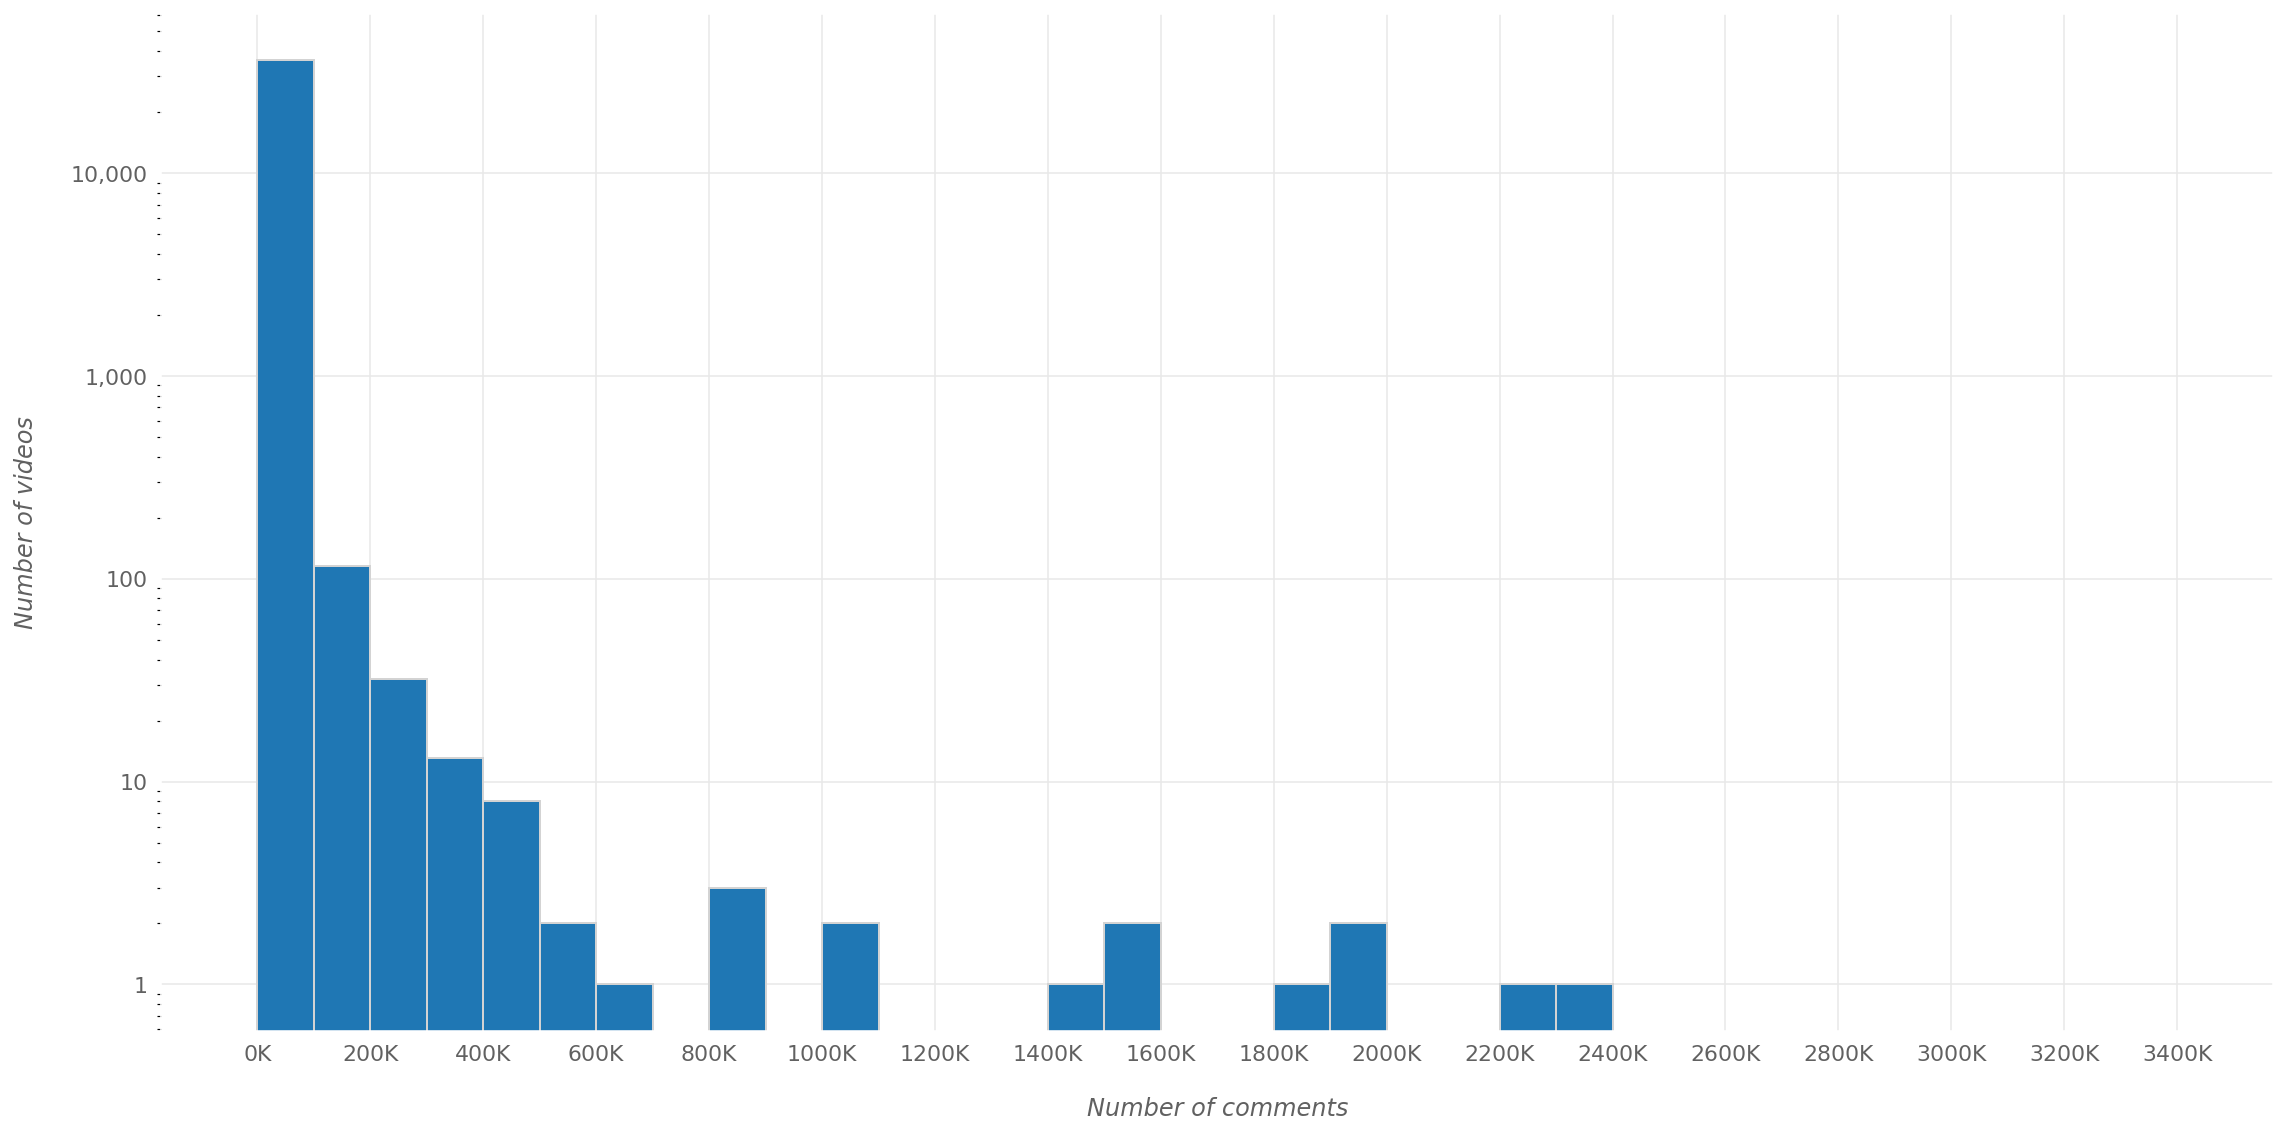

In [32]:
ax = df_clean['comment_count'].plot(kind='hist', bins=np.arange(0, 3.5e6, 1e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
plot_conf(ax, xlbl='Number of comments', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.0f}K'.format(x/1e3))
ax.xaxis.set_major_locator(ticker.MultipleLocator(200000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()


In [33]:
df_clean[df_clean['comment_count'] < 100_000].shape[0] / df_clean.shape[0] * 100

99.48837848989135

In [34]:
df_clean['comment_count'].quantile(q=0.9)

9940.0

In [35]:
df_clean.sort_values(by='comment_count', ascending=False).drop_duplicates(subset=['video_id']).head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,country,clean_text
9560,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21,HYBE LABELS,10,2021-05-21,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,67111752,7110071,8998,3400291,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,Music,usa,bts butter official mv
505,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21,Big Hit Labels,10,2020-08-21,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,Music,usa,bts dynamite official mv
3899,-5q5mZbe3V8,BTS (방탄소년단) 'Life Goes On' Official MV,2020-11-20,Big Hit Labels,10,2020-11-20,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,37570579,5177871,12125,2276126,False,False,BTS (방탄소년단) 'Life Goes On' Official MVCredits:...,Music,usa,bts life goes official mv
13611,awkkyBH2zEo,LISA - 'LALISA' M/V,2021-09-10,BLACKPINK,10,2021-09-11,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,85890366,5921316,38624,1958529,False,False,LISA - LALISA내 뒷모습만 봐도 알잖아어두워질 때 분홍빛이나새하얀 조명이 ...,Music,usa,lisa lalisa v
1010,2L6gsn7rGqI,GAME (Full Video) Shooter Kahlon | Sidhu Moo...,2020-09-03,5911 Records,10,2020-09-03,sidhu moose wala|game official video|shooter k...,4365130,578236,23306,1907588,False,False,5911 Records Presents.Song : GameSinger/Lyrics...,Music,usa,game full video shooter kahlon sidhu moose wal...


### Trending Videos vs Likes and Dislikes

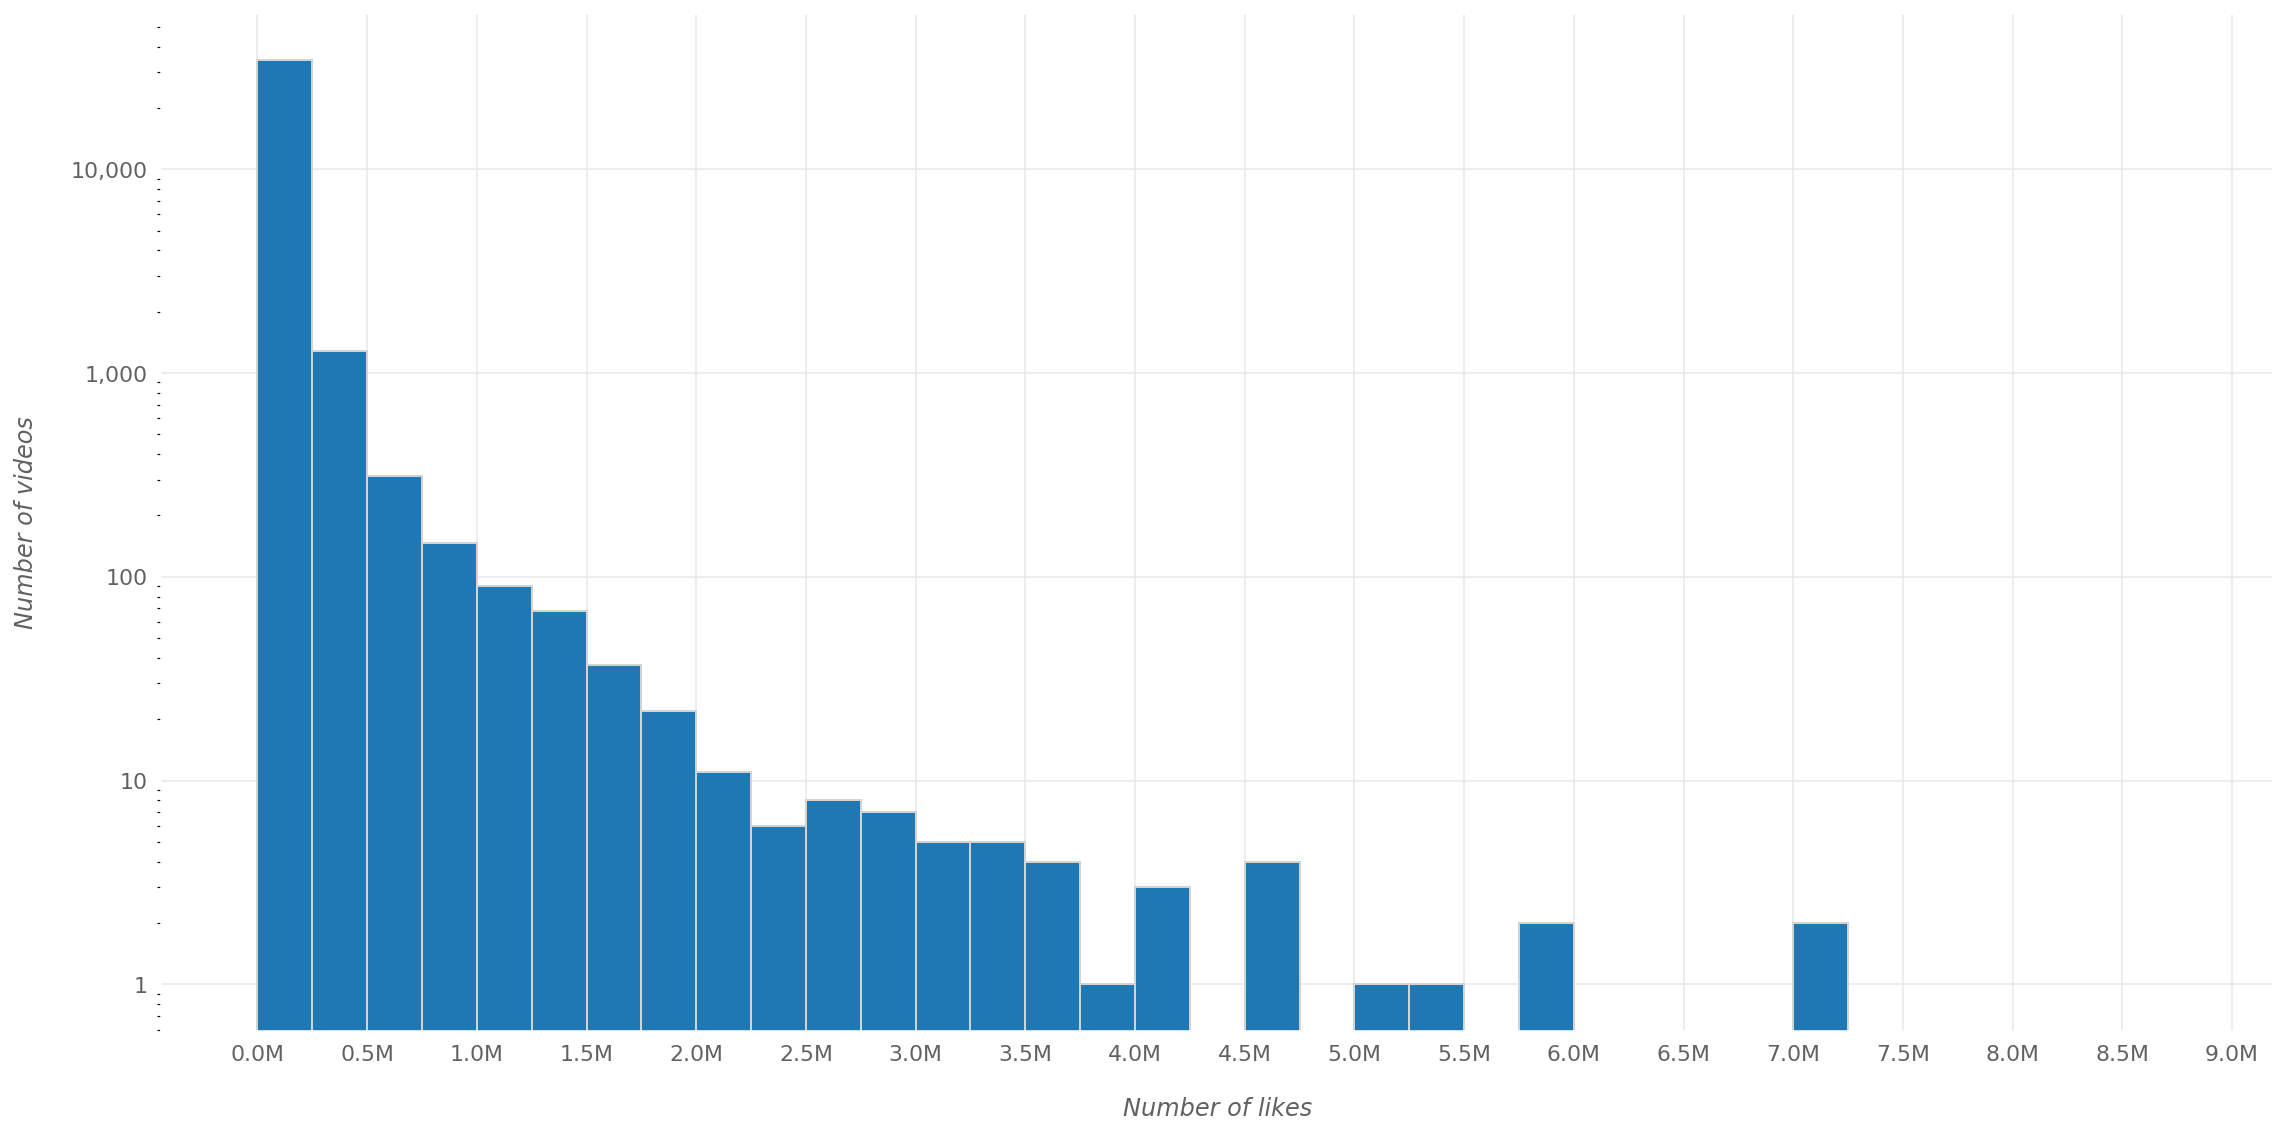

In [36]:
ax = df_clean['likes'].plot(kind='hist', bins=np.arange(0, 9e6, 2.5e5)-0.5, figsize=(16,8), 
                           logy=True, lw=1, ec='lightgray');
plot_conf(ax, xlbl='Number of likes', ylbl='Number of videos', ticklbl_size=11, lbl_size=12)
formatter = ticker.FuncFormatter(func=lambda x,y: '{:.1f}M'.format(x/1e6))
ax.xaxis.set_major_locator(ticker.MultipleLocator(500000))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatter));
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(fmt='{x:,.0f}'))
plt.tight_layout()


In [37]:
df_clean[df_clean['likes'] < 500_000].shape[0] / df_clean.shape[0] * 100

97.98102049236694

In [38]:
df_clean[df_clean['likes'] < 100_000].shape[0] / df_clean.shape[0] * 100

83.85091459221566

In [39]:
df_clean.sort_values(by='likes', ascending=False).drop_duplicates(subset=['video_id']).head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,category_name,country,clean_text
9560,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21,HYBE LABELS,10,2021-05-21,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,67111752,7110071,8998,3400291,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...,Music,usa,bts butter official mv
505,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21,Big Hit Labels,10,2020-08-21,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,57229275,7045907,165420,2314087,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...,Music,usa,bts dynamite official mv
13611,awkkyBH2zEo,LISA - 'LALISA' M/V,2021-09-10,BLACKPINK,10,2021-09-11,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,85890366,5921316,38624,1958529,False,False,LISA - LALISA내 뒷모습만 봐도 알잖아어두워질 때 분홍빛이나새하얀 조명이 ...,Music,usa,lisa lalisa v
768,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28,BLACKPINK,10,2020-08-28,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,51234434,5912778,405329,1847794,False,False,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...,Music,usa,blackpink ice cream selena gomez v
17947,CvCtn5Q_nzs,Crazy #alluarjun #painting #shorts #viral #tr...,2021-12-08,Dr.Harrsha Artist,1,2021-12-22,[None],79283769,5311001,0,24705,False,False,Crazy #alluarjun #painting #shorts #viral #tr...,Film & Animation,usa,crazy #alluarjun #painting #shorts #viral #tre...
